# Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import string
from nltk.corpus import stopwords

# Obtener datos

In [2]:
os.getcwd()

'C:\\Users\\wongp\\Udemy\\Data Science Aplicada\\Relaciones Publicas'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'amazon_alexa.tsv',
 'Modelo NLP Analisis de comentarios de clientes.ipynb',
 'PublicRelations_slides',
 'PublicRelations_slides.zip',
 '__MACOSX']

In [4]:
df = pd.read_csv("amazon_alexa.tsv", sep='\t')

In [5]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


# Entender Dataset

In [6]:
#observamos que no hay nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<AxesSubplot:>

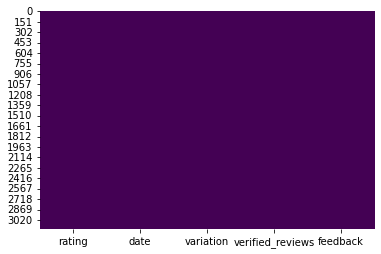

In [7]:
sns.heatmap(df.isnull(),cbar = False, cmap = "viridis")

In [8]:
cols = ["rating","variation","feedback"]
for i in cols:
    print("Columna: {}".format(i))
    print(df[i].value_counts())
    print("---------------------------------------")

Columna: rating
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64
---------------------------------------
Columna: variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64
---------------------------------------
Columna: feedback
1    2893
0     257
Name: feedback, dtype: int64
---------------------------------------


In [9]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [10]:
df.groupby(["rating"]).mean()

,feedback
rating,
1,0.0
2,0.0
3,1.0
4,1.0
5,1.0


In [11]:
df["verified_reviews"][3]

'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.'

<AxesSubplot:xlabel='feedback', ylabel='Count'>

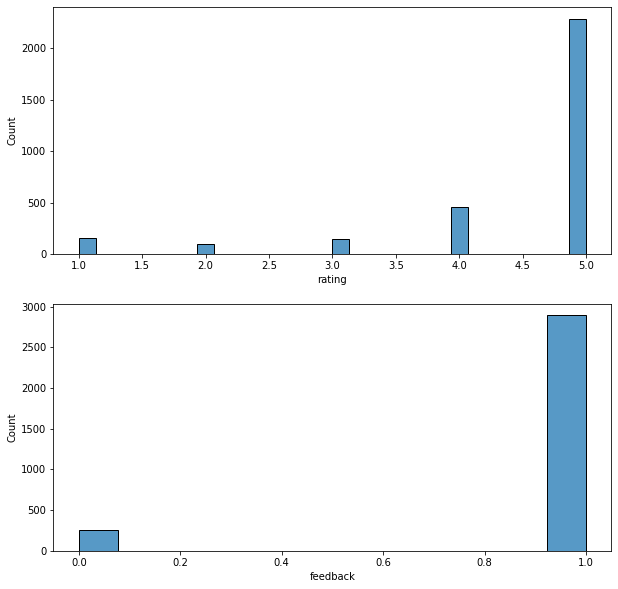

In [12]:
#df.hist()
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.histplot(data=df,x="rating")
plt.subplot(2,1,2)
sns.histplot(data=df,x="feedback")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Charcoal Fabric '),
  Text(1, 0, 'Walnut Finish '),
  Text(2, 0, 'Heather Gray Fabric '),
  Text(3, 0, 'Sandstone Fabric '),
  Text(4, 0, 'Oak Finish '),
  Text(5, 0, 'Black'),
  Text(6, 0, 'White'),
  Text(7, 0, 'Black  Spot'),
  Text(8, 0, 'White  Spot'),
  Text(9, 0, 'Black  Show'),
  Text(10, 0, 'White  Show'),
  Text(11, 0, 'Black  Plus'),
  Text(12, 0, 'White  Plus'),
  Text(13, 0, 'Configuration: Fire TV Stick'),
  Text(14, 0, 'Black  Dot'),
  Text(15, 0, 'White  Dot')])

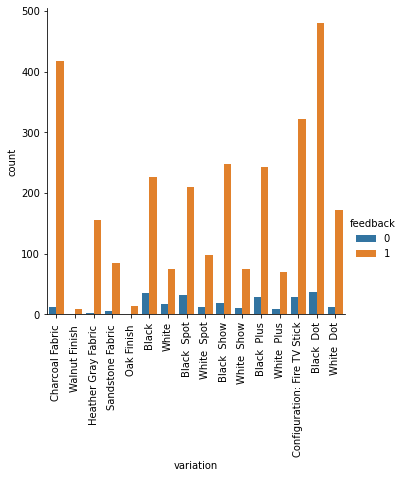

In [13]:
sns.catplot(data=df, kind="count", x="variation", hue="feedback")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Charcoal Fabric '),
  Text(1, 0, 'Walnut Finish '),
  Text(2, 0, 'Heather Gray Fabric '),
  Text(3, 0, 'Sandstone Fabric '),
  Text(4, 0, 'Oak Finish '),
  Text(5, 0, 'Black'),
  Text(6, 0, 'White'),
  Text(7, 0, 'Black  Spot'),
  Text(8, 0, 'White  Spot'),
  Text(9, 0, 'Black  Show'),
  Text(10, 0, 'White  Show'),
  Text(11, 0, 'Black  Plus'),
  Text(12, 0, 'White  Plus'),
  Text(13, 0, 'Configuration: Fire TV Stick'),
  Text(14, 0, 'Black  Dot'),
  Text(15, 0, 'White  Dot')])

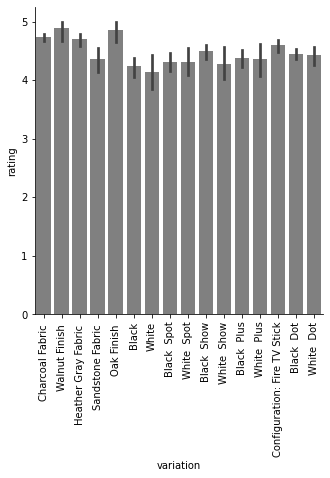

In [14]:
sns.catplot(data=df, kind="bar", x="variation", y="rating", color="gray")
plt.xticks(rotation=90)

In [15]:
df["largo_texto"] = df["verified_reviews"].apply(len) 
df

,rating,date,variation,verified_reviews,feedback,largo_texto
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


Text(0.5, 1.0, 'Scores by group and gender')

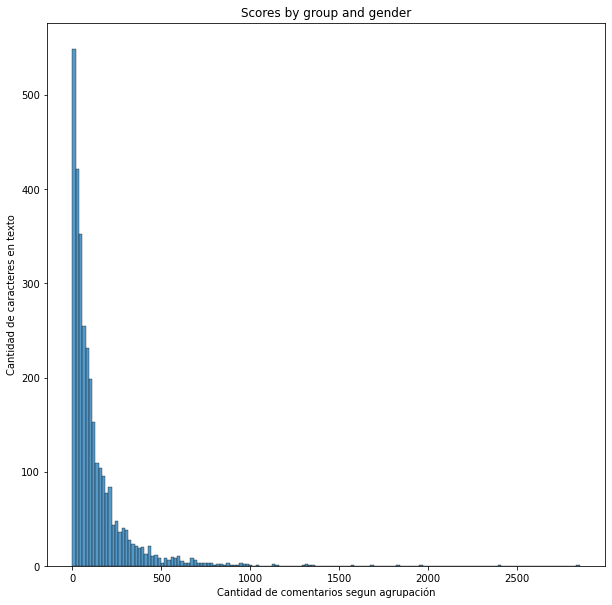

In [16]:
plt.figure(figsize=(10,10))
sns.histplot(data=df,x="largo_texto")
plt.ylabel('Cantidad de caracteres en texto')
plt.xlabel('Cantidad de comentarios segun agrupación')
plt.title('Scores by group and gender')

In [17]:
df["largo_texto"].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: largo_texto, dtype: float64

In [18]:
df[df["largo_texto"]==1]["verified_reviews"].iloc[0]

'😍'

In [19]:
df[df["largo_texto"]==2851]["verified_reviews"].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [20]:
df[df["largo_texto"]==132]["verified_reviews"].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [21]:
positivo = df[df["feedback"]==1]
negativo = df[df["feedback"]==0]

In [22]:
sentences = df["verified_reviews"].to_list()
sentences_all = " ".join(sentences)

sentences_positivo = positivo["verified_reviews"].to_list()
sentences_positivo_all = " ".join(sentences_positivo)

sentences_negativo = negativo["verified_reviews"].to_list()
sentences_negativo_all = " ".join(sentences_negativo)

Text(0.5, 1.0, 'Cuadro de palabras de comentarios negativos')

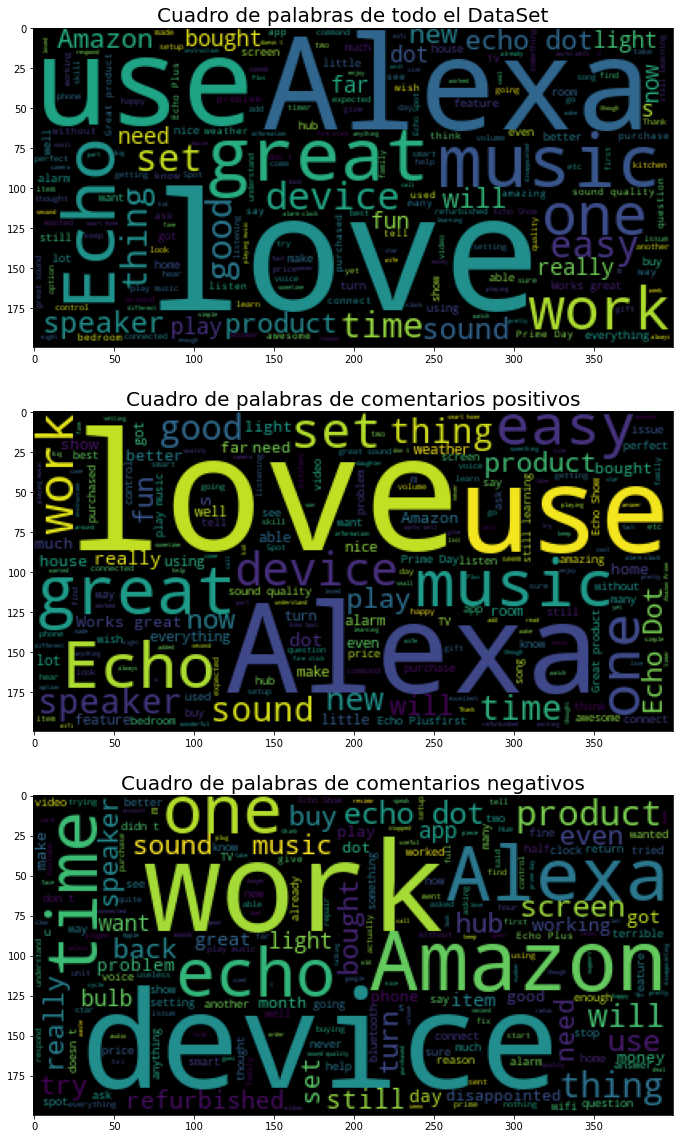

In [23]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
plt.imshow(WordCloud().generate(sentences_all))
plt.title("Cuadro de palabras de todo el DataSet",fontsize=20)

plt.subplot(3,1,2)
plt.imshow(WordCloud().generate(sentences_positivo_all))
plt.title("Cuadro de palabras de comentarios positivos",fontsize=20)

plt.subplot(3,1,3)
plt.imshow(WordCloud().generate(sentences_negativo_all))
plt.title("Cuadro de palabras de comentarios negativos",fontsize=20)

# Limpieza de datos para modelo

In [24]:
reviews_df = df.drop(["date","rating","largo_texto"], axis=1)
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [25]:
variation_dummies = pd.get_dummies(reviews_df["variation"],drop_first=True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
reviews_df.drop("variation",axis=1,inplace=True)

In [27]:
reviews_df = pd.concat([reviews_df,variation_dummies],axis=1)
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## ---------------------------------------------------------------------

## Ejercicios de trabajo de text + Tokenizacion

In [28]:
#eliminar signos de puntuacion
string.punctuation

#eliminar stopwards

#todo en minusculas

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
test = "Aqui hay un minireto, que nos enseñara como remover las  palabras de relleno!!"
test = test.lower()
lista = []
for char in test:
    if char not in string.punctuation:
        lista.append(char)

test = "".join(lista)
print(test)

aqui hay un minireto que nos enseñara como remover las  palabras de relleno


In [30]:
lista = []
print("-----Quitar palabras de relleno------")
test = test.split()
#nltk.download('stopwords')
for i in test:
    if i not in stopwords.words("spanish"):
        lista.append(i)
#print(test)
lista = " ".join(lista)
lista

-----Quitar palabras de relleno------


'aqui minireto enseñara remover palabras relleno'

In [31]:
test = "Aqui hay un minireto, que nos enseñara como remover las  palabras de relleno!!"
test_sin_signos = [char for char in test if char not in string.punctuation]
test_sin_signos = "".join(test_sin_signos)
test_sin_signos_palabras = [palabra for palabra in test_sin_signos.split() if palabra not in stopwords.words("spanish")]
test_sin_signos_palabras

['Aqui', 'minireto', 'enseñara', 'remover', 'palabras', 'relleno']

In [32]:
reto  = ["Hello World", "Hello Hello World", "Hello World world world"]

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
x = vector.fit_transform(reto)
print(vector.get_feature_names())
print(x.toarray())

['hello', 'world']
[[1 1]
 [2 1]
 [1 3]]


## ---------------------------------------------------------------------

In [33]:
#todo en minusculas
#eliminar signos de puntuacion
#eliminar stopwards

def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = "".join(test_punc_removed)
    test_punc_removed_join_clean = [palabra for palabra in test_punc_removed_join.split() if palabra not in stopwords.words("english")]
    return test_punc_removed_join_clean

In [34]:
reviews_df_clean = reviews_df["verified_reviews"].apply(message_cleaning)
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [I, lot, fun, thing, My, 4, yr, old, learns, d...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [I, love, things, running, entire, home, TV, l...
3148    [Only, complaint, I, sound, quality, isnt, gre...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [35]:
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df["verified_reviews"])

In [36]:
print(vectorizer.get_feature_names(), len(vectorizer.get_feature_names()))

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [37]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
reviews_countvectorizer.shape

(3150, 5344)

In [39]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
reviews_df.drop("verified_reviews", axis=1, inplace=True)

In [41]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [42]:
reviews

,0,1,2,3,4,5,6,7,8,9,...,5334,5335,5336,5337,5338,5339,5340,5341,5342,5343
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
reviews_df = pd.concat([reviews_df,reviews],axis=1)
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5334,5335,5336,5337,5338,5339,5340,5341,5342,5343
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x = reviews_df.drop(["feedback"],axis=1)
Y = reviews_df["feedback"]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size = 0.2)

In [46]:
from sklearn.naive_bayes import MultinomialNB
modelo = MultinomialNB()
modelo.fit(x_train,y_train)

MultinomialNB()

In [47]:
predicciones = modelo.predict(x_train)

<AxesSubplot:>

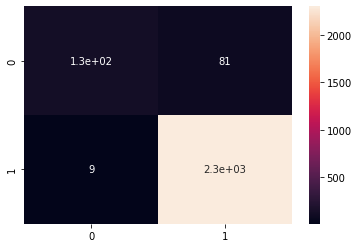

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_train,predicciones)
sns.heatmap(cm,annot=True)

<AxesSubplot:>

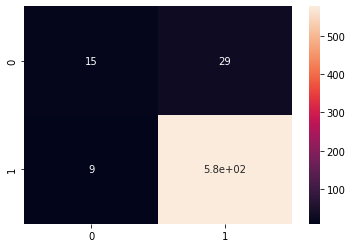

In [49]:
predicciones_test = modelo.predict(x_test)
cm=confusion_matrix(y_test,predicciones_test)
sns.heatmap(cm,annot=True)

In [50]:
print(classification_report(y_test,predicciones_test))

              precision    recall  f1-score   support

           0       0.62      0.34      0.44        44
           1       0.95      0.98      0.97       586

    accuracy                           0.94       630
   macro avg       0.79      0.66      0.70       630
weighted avg       0.93      0.94      0.93       630



<AxesSubplot:>

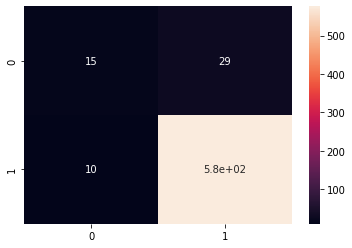

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model2 = LogisticRegression()
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.34      0.43        44
           1       0.95      0.98      0.97       586

    accuracy                           0.94       630
   macro avg       0.78      0.66      0.70       630
weighted avg       0.93      0.94      0.93       630



In [53]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,